### Loading python packages 

### Set your working directory

In [5]:
wd = "/Volumes/Tim_Extern/IEO/HNSCC_Descriptive"

In [6]:
import os
os.getcwd()

'/Volumes/Tim_Extern/IEO/HNSCC_Descriptive'

In [7]:
os.chdir(wd)
os.getcwd()

'/Volumes/Tim_Extern/IEO/HNSCC_Descriptive'

In [10]:
import anndata
import igraph
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import scipy
import scipy.optimize
import scvelo as scv
import sklearn
import cellrank as cr
import deepvelo as dv

### Read in data 
Two untreated and two treated samples 

In [11]:
# US
GEX1 = anndata.read('data/velocity/preprocessing_velocity/kb_count/GEX1/counts_unfiltered/adata.h5ad')
GEX2 = anndata.read('data/velocity/preprocessing_velocity/kb_count/GEX2/counts_unfiltered/adata.h5ad')

# Stim
GEX3 = anndata.read('data/velocity/preprocessing_velocity/kb_count/GEX3/counts_unfiltered/adata.h5ad')
GEX4 = anndata.read('data/velocity/preprocessing_velocity/kb_count/GEX4/counts_unfiltered/adata.h5ad')

### Filter data to match seurat object and add metadata - untreated

saving figure to file results/Manuscript/Figure3/untreated_scvelo_prop.png


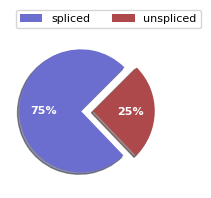

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:07) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
import pandas as pd
# combine untreated samples
GEX1.obs['sample'] = 'S1'
GEX2.obs['sample'] = 'S2'

GEX1.obs['bcs'] = GEX1.obs.index
GEX2.obs['bcs'] = GEX2.obs.index

GEX1.obs.index = GEX1.obs['sample'] + "_" + GEX1.obs['bcs']  + "-1"
GEX2.obs.index = GEX2.obs['sample'] + "_" + GEX2.obs['bcs']  + "-1"


sc_untreated = GEX1.concatenate(GEX2,index_unique=None)

scv.pl.proportions(sc_untreated, save="results/Manuscript/Figure3/untreated_scvelo_prop.png")


# filter for cell IDs from seurat 
sample_obs_untreated = pd.read_csv("results/Manuscript/Figure3/US/cellID_obs.csv")

sc_untreated = sc_untreated[np.isin(sc_untreated.obs.index,sample_obs_untreated["x"])].copy()
sc_untreated


# add UMAP coordinates
umap_untreated = pd.read_csv("results/Manuscript/Figure3/US/cell_embeddings.csv")

sc_untreated.obsm['X_umap'] = umap_untreated.iloc[:,1:].values

# add cluster info
cluster_untreated = pd.read_csv("results/Manuscript/Figure3/US/clusters.csv")
sc_untreated.obs['clusters'] = cluster_untreated.iloc[:,1:].values

# Filter genes and normalise
scv.pp.filter_and_normalize(sc_untreated)
sc_untreated

# calculate first and second order moments
scv.pp.moments(sc_untreated)
sc_untreated

# save data
sc_untreated.write('saves/AnnData/sc_untreated_velocity.h5ad')

### spliced to unspliced proportions - untreated

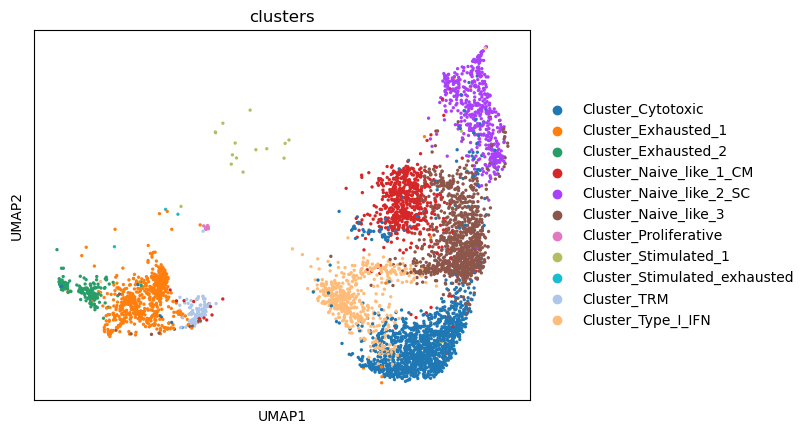

saving figure to file results/Manuscript/Figure3/US/scvelo_prop.png


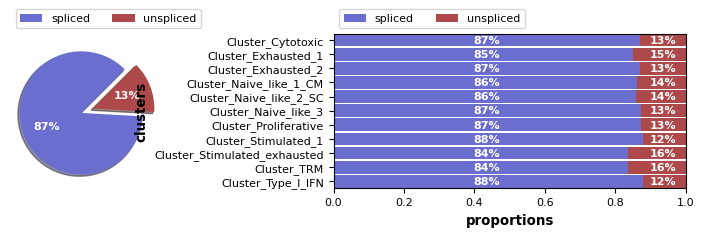

In [13]:
sc.pl.embedding(sc_untreated,
basis = 'umap',
color ="clusters",
save = "_scvelo_clusters.png") 

# typically have between 10%-25% of unspliced molecules containing intronic sequences
scv.pl.proportions(sc_untreated,
save = "results/Manuscript/Figure3/US/scvelo_prop.png")

### Filter data to match seurat object and add metadata - treated

saving figure to file results/Manuscript/Figure3/treated_scvelo_prop.png


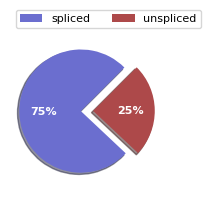

ValueError: Value passed for key 'X_umap' is of incorrect shape. Values of obsm must match dimensions (0,) of parent. Value had shape (5523, 2) while it should have had (0,).

In [18]:
import pandas as pd
# combine untreated samples
GEX3.obs['sample'] = 'S3'
GEX4.obs['sample'] = 'S4'

GEX3.obs['bcs'] = GEX3.obs.index
GEX4.obs['bcs'] = GEX4.obs.index

GEX3.obs.index = GEX3.obs['sample'] + "_" + GEX3.obs['bcs']  + "-1"
GEX4.obs.index = GEX4.obs['sample'] + "_" + GEX4.obs['bcs']  + "-1"


sc_treated = GEX3.concatenate(GEX4,index_unique=None)

scv.pl.proportions(sc_treated, save="results/Manuscript/Figure3/treated_scvelo_prop.png")


# filter for cell IDs from seurat 
sample_obs_treated = pd.read_csv("results/Manuscript/Figure3/Stimulated/cellID_obs.csv")

sc_treated = sc_treated[np.isin(sc_treated.obs.index,sample_obs_treated["x"])].copy()
sc_treated


# add UMAP coordinates
umap_treated = pd.read_csv("results/Manuscript/Figure3/Stimulated/cell_embeddings.csv")

sc_treated.obsm['X_umap'] = umap_treated.iloc[:,1:].values

# add cluster info
cluster_treated = pd.read_csv("results/Manuscript/Figure3/Stimulated/clusters.csv")
sc_treated.obs['clusters'] = cluster_treated.iloc[:,1:].values

# Filter genes and normalise
scv.pp.filter_and_normalize(sc_treated)
sc_untreated

# calculate first and second order moments
scv.pp.moments(sc_treated)
sc_untreated

# save data
sc_treated.write('saves/AnnData/sc_treated_velocity.h5ad')

### spliced to unspliced proportions - treated

In [ ]:
sc.pl.embedding(sc_treated,
basis = 'umap',
color ="clusters",
save = "_scvelo_clusters.png") 

# typically have between 10%-25% of unspliced molecules containing intronic sequences
scv.pl.proportions(sc_treated,
save = "results/Manuscript/Figure3/Stimulated/scvelo_prop.png")

### Save whole dataset

saving figure to file results/Manuscript/Figure3/whole_dataset/sc_all_scvelo_prop.png


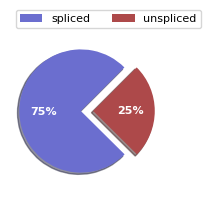

ValueError: Value passed for key 'X_umap' is of incorrect shape. Values of obsm must match dimensions (0,) of parent. Value had shape (10688, 2) while it should have had (0,).

In [16]:
import pandas as pd
# combine untreated samples
GEX1.obs['sample'] = 'S1'
GEX2.obs['sample'] = 'S2'

GEX1.obs['bcs'] = GEX1.obs.index
GEX2.obs['bcs'] = GEX2.obs.index

GEX1.obs.index = GEX1.obs['sample'] + "_" + GEX1.obs['bcs']  + "-1"
GEX2.obs.index = GEX2.obs['sample'] + "_" + GEX2.obs['bcs']  + "-1"


sc_untreated = GEX1.concatenate(GEX2,index_unique=None)

# combine untreated samples
GEX3.obs['sample'] = 'S3'
GEX4.obs['sample'] = 'S4'

GEX3.obs['bcs'] = GEX3.obs.index
GEX4.obs['bcs'] = GEX4.obs.index

GEX3.obs.index = GEX3.obs['sample'] + "_" + GEX3.obs['bcs']  + "-1"
GEX4.obs.index = GEX4.obs['sample'] + "_" + GEX4.obs['bcs']  + "-1"


sc_treated = GEX3.concatenate(GEX4,index_unique=None)

sc_all = sc_treated.concatenate(sc_untreated,index_unique=None)

scv.pl.proportions(sc_all, save="results/Manuscript/Figure3/whole_dataset/sc_all_scvelo_prop.png")


# filter for cell IDs from seurat 
sample_obs_all = pd.read_csv("results/Manuscript/Figure3/whole_dataset/cellID_obs.csv")

sc_all = sc_all[np.isin(sc_all.obs.index,sample_obs_all["x"])].copy()
sc_all


# add UMAP coordinates
umap_all = pd.read_csv("results/Manuscript/Figure3/whole_dataset/cell_embeddings.csv")

sc_all.obsm['X_umap'] = umap_all.iloc[:,1:].values

# add cluster info
cluster_all = pd.read_csv("results/Manuscript/Figure3/whole_dataset/clusters.csv")
sc_all.obs['clusters'] = cluster_all.iloc[:,1:].values

# Filter genes and normalise
scv.pp.filter_and_normalize(sc_all)
sc_all

# calculate first and second order moments
scv.pp.moments(sc_all)
sc_all

# save data
sc_all.write('saves/AnnData/sc_all_velocity.h5ad')

In [ ]:
sc.pl.embedding(sc_all,
basis = 'umap',
color ="clusters",
save = "_scvelo_clusters.png") 

# typically have between 10%-25% of unspliced molecules containing intronic sequences
scv.pl.proportions(sc_all,
save = "results/Manuscript/Figure3/Stimulated/scvelo_prop.png")